# **Task-1**
# **Expected Calibration Error (Build ECE from scratch)**

1. **Define Bin Boundaries**: Divide the range [0, 1] into M equal parts to create bins.
   
2. **Calculate Confidences**: For each sample, find the maximum confidence value among its predicted classes.

3. **Determine Predicted Labels**: For each sample, identify the predicted label based on the class with the highest confidence.

4. **Calculate Accuracies**: Compare the predicted labels with the true labels to determine whether each prediction is correct or not.

5. **Initialize ECE**: Set the Expected Calibration Error (ECE) to zero.

6. **Iterate Over Bins**: For each bin:
   - **Determine Bin Membership**: Check which samples fall into the current bin based on their confidence values.
   - **Calculate Probability in Bin**: Find the proportion of samples that fall into the current bin.
   - **Check Non-Empty Bin**: If the bin is not empty:
     - **Calculate Accuracy in Bin**: Calculate the average accuracy of the samples in the bin.
     - **Calculate Average Confidence in Bin**: Calculate the average confidence of the samples in the bin.
     - **Calculate ECE Contribution**: Find the absolute difference between the average confidence and accuracy, then multiply it by the probability of being in the bin and add it to the total ECE.

7. **Return ECE**: Return the calculated ECE value.



In [76]:
import numpy as np

def ece_task(samples, true_labels, M=5):
    bin_boundaries = np.linspace(0, 1, M + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    confidences = np.max(samples, axis=1)
    predicted_label = np.argmax(samples, axis=1)

    accuracies = predicted_label==true_labels

    ece = np.zeros(1)
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = np.logical_and(confidences > bin_lower.item(), confidences <= bin_upper.item())
        prob_in_bin = in_bin.mean()

        if prob_in_bin.item() > 0:
            accuracy_in_bin = accuracies[in_bin].mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prob_in_bin

    return ece, bin_uppers

# **Binary Classification**

In [68]:
samples = np.array([[0.78, 0.22],
                    [0.36, 0.64],
                    [0.08, 0.92],
                    [0.58, 0.42],
                    [0.49, 0.51],
                    [0.85, 0.15],
                    [0.30, 0.70],
                    [0.63, 0.37],
                    [0.17, 0.83]])

true_labels = np.array([0,1,0,0,0,0,1,1,1])


error, ece_task(samples, true_labels)

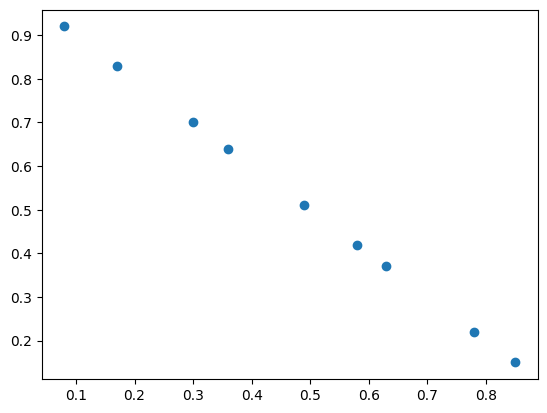

In [70]:
plt.scatter(samples[:, 0], samples[:, 1])

In [ ]:
plt.line()

-----------

# **Multi classification**

In [51]:
samples_multi = np.array([[0.25,0.2,0.22,0.18,0.15],
                          [0.16,0.06,0.5,0.07,0.21],
                          [0.06,0.03,0.8,0.07,0.04],
                          [0.02,0.03,0.01,0.04,0.9],
                          [0.4,0.15,0.16,0.14,0.15],
                          [0.15,0.28,0.18,0.17,0.22],
                          [0.07,0.8,0.03,0.06,0.04],
                          [0.1,0.05,0.03,0.75,0.07],
                          [0.25,0.22,0.05,0.3,0.18],
                          [0.12,0.09,0.02,0.17,0.6]])

true_labels_multi = np.array([0,2,3,4,2,0,1,3,3,2])


ece_task(samples_multi, true_labels_multi, M=3)

(array([0.192]), array([0.33333333, 0.66666667, 1.        ]))

In [53]:
from matplotlib import pyplot as plt

# Please apply ECE on Heart disese

https://docs.google.com/spreadsheets/d/1C51KkOhL5cyZNKhrM6Wk0gJOWn3q1SnVgHy_Zt9aBiE/edit?usp=sharing


In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('/kaggle/input/heartdesiese/heart_statlog_cleveland_hungary_final - heart_statlog_cleveland_hungary_final.csv')

In [28]:
X_train = data.drop(columns='target')
y_train = data['target']

In [55]:
X = np.array(X_train)
y = np.array(y_train)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities
probabilities = model.predict_proba(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
probabilities[:5]

array([[0.87488649, 0.12511351],
       [0.96011827, 0.03988173],
       [0.97307998, 0.02692002],
       [0.66493202, 0.33506798],
       [0.86120938, 0.13879062]])

In [77]:
error, uppers = ece_task(probabilities, y_test, M=3)

In [78]:
X_train

array([[50. ,  1. ,  4. , ...,  1. ,  1.1,  2. ],
       [37. ,  1. ,  4. , ...,  0. ,  0. ,  1. ],
       [43. ,  1. ,  4. , ...,  0. ,  1.2,  2. ],
       ...,
       [54. ,  1. ,  3. , ...,  0. ,  0.4,  2. ],
       [48. ,  1. ,  4. , ...,  0. ,  0. ,  1. ],
       [69. ,  1. ,  4. , ...,  1. ,  1.5,  2. ]])

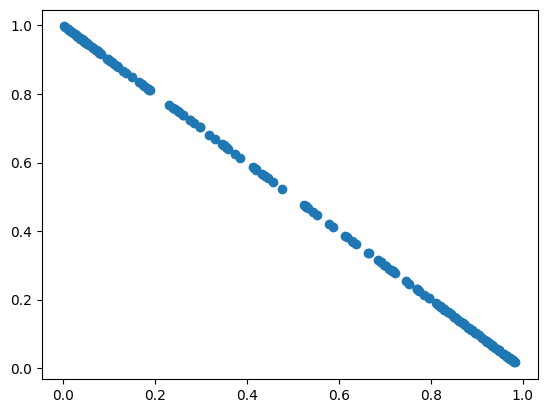

In [79]:
plt.scatter(probabilities[:, 0], probabilities[:, 1])

In [72]:
uppers

array([0.2, 0.4, 0.6, 0.8, 1. ])

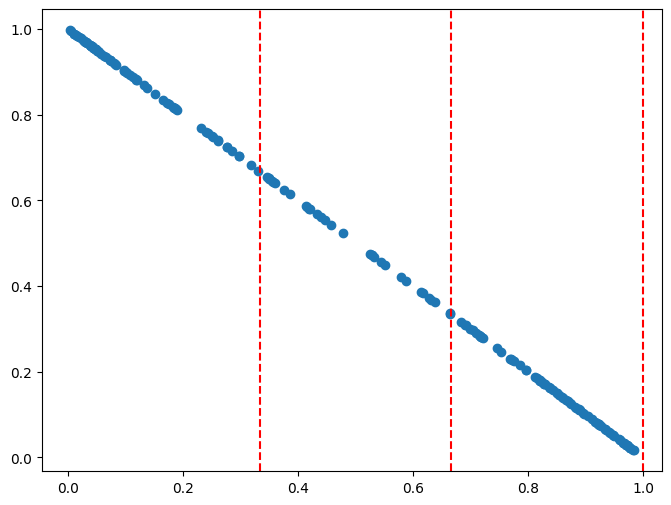

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for plotting
x = np.linspace(-10, 10, 100)  # 100 linearly spaced points between -10 and 10
y = 2 * x + 1  # Example linear function y = 2x + 1

# Array of upper bounds where you want to draw vertical lines
x_indices = np.array(uppers)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(probabilities[:, 0], probabilities[:, 1])

# Add vertical lines at each x index
for xi in x_indices:
    plt.axvline(x=xi, color='r', linestyle='--', label=f'x = {xi}')

# Adding title
